# IIT2019173

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
from matplotlib import image as Image
import cv2
import math

# Wavelet decomposition

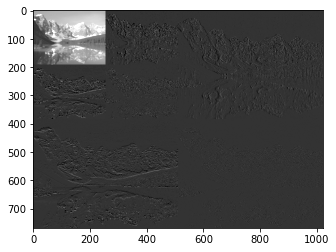

In [2]:
img = Image.imread('scene.jpg')
mea = np.mean(img, -1); 
n = 2
w = 'db1'
coeff = pywt.wavedec2(mea,wavelet=w,level=n)    
coeff[0] /= np.abs(coeff[0]).max()     

for dl in range(n):
    coeff[dl + 1] = [d/np.abs(d).max() for d in coeff[dl + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeff) 
plt.imshow(arr,cmap='gray',vmin=-0.20,vmax=0.80)
plt.show()

# Decompression

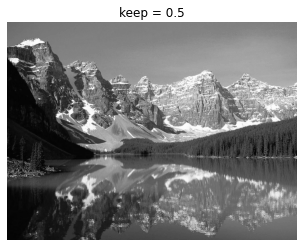

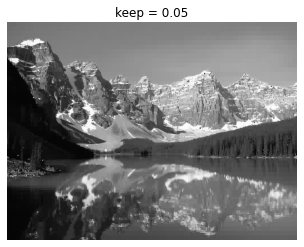

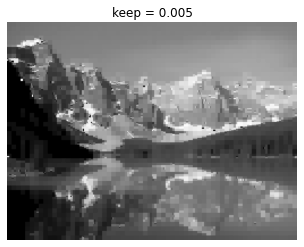

In [7]:
n = 4
w = 'db1'
coeff = pywt.wavedec2(mea,wavelet=w,level=n)
coeff_arr, coeff_slices = pywt.coeffs_to_array(coeff)
Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for k in (0.5, 0.05, 0.005):
    thresh = Csort[int(np.floor((1-k)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind 
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    Temp = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Temp.astype('uint8'),cmap='gray')
    plt.savefig('fig_'+str(k)+'.jpg', dpi=300, bbox_inches='tight')
    plt.axis('off')
    plt.title('keep = ' + str(k))

# RMS error calculation

In [9]:
original = cv2.imread('scene.jpg')
uncompressed = cv2.imread('fig_0.005.jpg')
m,n,p = original.shape

sum = 0
for i in range(m):
    for j in range(n):
        for k in range(p):    
            sum = sum + ((original[i,j,k] - uncompressed[i,j,k])*(original[i,j,k] - uncompressed[i,j,k]))
sum = sum/(m*n*p)
print('RMS error:',math.sqrt(sum))

C:\Users\rajen\AppData\Local\Temp/ipykernel_7084/3695681460.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  sum = sum + ((original[i,j,k] - uncompressed[i,j,k])*(original[i,j,k] - uncompressed[i,j,k]))


RMS error: 10.250488641768232
